In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [2]:
# ADD NEW COLUMNS TO BUSINESS DATAFRAME DERIVED FROM BUSINESS DATAFRAME

In [3]:
business = pd.read_csv('./business_oh.csv')
business.shape

(14697, 14)

In [4]:
business.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [5]:
# Do clustering kmeans of lat lon
X = business[['latitude', 'longitude', 'review_count']]

from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, random_state=1)
km.fit(X)

km.labels_

lat_long_df = business
lat_long_df['lat_lon_cluster'] = km.labels_

km.cluster_centers_

lat_long_groupby_df = lat_long_df.groupby('lat_lon_cluster').mean().sort_values('stars')
lat_long_groupby_df 

,latitude,longitude,stars,review_count,is_open
lat_lon_cluster,,,,,
7,41.405004,-81.655725,3.464836,5.027083,0.847111
1,41.408748,-81.655550,3.495747,16.883634,0.851990
6,41.418755,-81.645971,3.551435,38.227273,0.841308
4,41.419818,-81.652360,3.707891,67.743551,0.896813
8,41.420811,-81.660544,3.775862,111.596817,0.907162
0,41.445480,-81.659154,3.803867,170.845304,0.950276
5,41.454293,-81.686698,3.856164,264.013699,0.958904
2,41.462097,-81.672902,3.952381,553.238095,0.952381
9,41.482522,-81.691090,3.964286,396.321429,0.964286


In [6]:
# count the number of rows in each cluster
from collections import Counter, defaultdict
print(Counter(km.labels_)

SyntaxError: unexpected EOF while parsing (<ipython-input-6-b1b3a53e144d>, line 3)

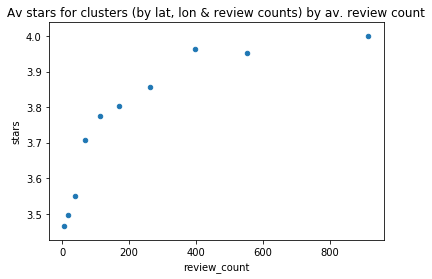

In [7]:
# Plotting average review count per restaurant in a zip against average star rating 
lat_long_groupby_df.plot(kind='scatter', x='review_count', y='stars', title = 'Av stars for clusters (by lat, lon & review counts) by av. review count');

In [8]:
# Turn post_code from a float into a string and make a it a new column and fill nan as 0
business['postal_code_str'] = business.postal_code.astype(str)
business['postal_code_str'] = business['postal_code_str'].map(lambda x: x.rstrip('.0'))
business['postal_code_str'].fillna(0, inplace=True)

In [9]:
business.dtypes

business_id         object
name                object
address             object
city                object
state               object
postal_code         object
latitude           float64
longitude          float64
stars              float64
review_count         int64
is_open              int64
attributes          object
categories          object
hours               object
lat_lon_cluster      int32
postal_code_str     object
dtype: object

In [10]:
# ADD NEW COLUMNS TO USERS DATAFRAME DERIVED FROM USERS DATAFRAME

In [11]:
users = pd.read_csv('./users_oh.csv')
users.shape

(92622, 22)

In [12]:
# fill 'elite' nan values with zeros but create as a new column
users['elite_no_nan'] = users.elite.fillna(0)
users.shape

(92622, 23)

In [13]:
users.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_no_nan
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,...,0,0,0,1,1,1,1,2,0,"2015,2016,2017"


In [14]:
# Creating a column for friend count

# create new dataframe with only rows for users who have no 'friends'
no_friends_df = users[users['friends'] == 'None']
 
# create new column and populate with zeros
def function_friends_none(z):
    if z == 'None':
        return 0
    else:
        return 1
no_friends_df['friend_count'] = no_friends_df['friends'].apply(function_friends_none)
# check there are no '1's in the the column
no_friends_df['friend_count'].sum()
# filter columns of the dataframe and create a new one for merging 
no_friends_filtered_df = no_friends_df[['user_id','friend_count']]
len(no_friends_filtered_df)
no_friends_filtered_df

# create new dataframe with only rows for users who have one or more 'friends'
one_or_more_friends_df = users[users['friends'] != 'None']
# Count the number of friends
one_or_more_friends_df['friend_count'] = one_or_more_friends_df['friends'].str.count(',')+1
# filter columns of the dataframe and create a new one for merging 
one_or_more_friends_filtered_df = one_or_more_friends_df[['user_id','friend_count']]


/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
# merge the two new dataframes 
friend_count_df = pd.concat([no_friends_filtered_df, one_or_more_friends_filtered_df])
friend_count_df 

,user_id,friend_count
7395,8iFdGflRabklAt3G_Pd0ug,0
7396,TsZxDJuhgReq8SeoQYSy8g,0
7397,zunWrhzfbH1UUBtZbRB_QQ,0
7398,PeKouqRuQU7eJM24fUm6KQ,0
7399,fs0xfZ1JKigEHO_nB0R7mQ,0
...,...,...
91302,zi_SpBv3Born9kXEc7LlIA,9
91422,bICtVzEenh9UtEoj-pMTtg,1
91726,Fuv1shWKfQvS7uLOICpR7w,2
92075,xOfUwumhFdn39OaweGtN-Q,1


In [16]:
# add friend count dataframe into users dataframe
users_plus_friend_count = users.merge(friend_count_df, on='user_id', how='left')
users_plus_friend_count.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_no_nan,friend_count
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,...,0,0,1,1,1,1,2,0,"2015,2016,2017",99


In [17]:
# create categories for number of friends
criteria = [users_plus_friend_count['friend_count'].between(0,0), users_plus_friend_count['friend_count'].between(1,10), users_plus_friend_count['friend_count'].between(11,50), users_plus_friend_count['friend_count'].between(51,200), users_plus_friend_count['friend_count'].between(201,200000)]
values = ['0', '1-10', '11-50', '51-200', '201+']
users_plus_friend_count['count_of_friends_segments'] = np.select(criteria, values, 0)
users_plus_friend_count.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_no_nan,friend_count,count_of_friends_segments
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,...,0,1,1,1,1,2,0,"2015,2016,2017",99,51-200


In [18]:
# Rename review_count to indicate that this includes restaurant non restaurant reviews 
users_plus_friend_rename = users_plus_friend_count.rename(columns={'review_count':'review_count_user_id'})
users_plus_friend_rename.head(1)

,user_id,name,review_count_user_id,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_no_nan,friend_count,count_of_friends_segments
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,...,0,1,1,1,1,2,0,"2015,2016,2017",99,51-200


In [19]:
users_merge = users_plus_friend_rename[['user_id', 'review_count_user_id','elite_no_nan', 'friends','friend_count', 'count_of_friends_segments']]
users_merge.head(1)

,user_id,review_count_user_id,elite_no_nan,friends,friend_count,count_of_friends_segments
0,l6BmjZMeQD3rDxWUbiAiow,95,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",99,51-200


In [20]:
# ADD NEW COLUMNS TO REVIEWS DATAFRAME DERIVED FROM REVIEWS DATAFRAME

In [21]:
reviews = pd.read_csv('./reviews_oh.csv')
reviews.shape

(321345, 9)

In [22]:
reviews.dtypes

review_id      object
user_id        object
business_id    object
stars           int64
useful          int64
funny           int64
cool            int64
text           object
date           object
dtype: object

In [23]:
# create datetime column and a year column to get an overview of when the reviews were submitted
reviews['datetime'] = pd.to_datetime(reviews['date'])
reviews['year'] = pd.to_datetime(reviews['date']).dt.to_period('Y')
reviews['year'].value_counts(normalize=True).sort_index(axis = 0)

2005    0.000386
2006    0.001130
2007    0.002589
2008    0.006538
2009    0.011576
2010    0.025957
2011    0.046346
2012    0.060502
2013    0.075564
2014    0.110218
2015    0.147735
2016    0.162019
2017    0.174330
2018    0.175111
Freq: A-DEC, Name: year, dtype: float64

In [24]:
# Check to see if the review is a one and add as a new columns to indicate whether true
def is_it_a_one (i):
    if i == 1:
        return 1
    else:
        return 0
reviews['is_it_a_one'] = reviews['stars'].apply(is_it_a_one)

# Check to see if the review is a five and add as a new columns to indicate whether true
def is_it_a_five (i):
    if i == 5:
        return 1
    else:
        return 0
reviews['is_it_a_five'] = reviews['stars'].apply(is_it_a_five)

# Check to see if the review is a five and add as a new columns to indicate whether true
def is_it_a_one_or_two (i):
    if i == 1 or i ==2:
        return 1
    else:
        return 0
reviews['is_it_a_one_or_two'] = reviews['stars'].apply(is_it_a_one_or_two)

# Check to see if the review is a five and add as a new columns to indicate whether true
def is_it_a_four_or_five (i):
    if i == 4 or i ==5:
        return 1
    else:
        return 0
reviews['is_it_a_four_or_five'] = reviews['stars'].apply(is_it_a_four_or_five)

# Check to see if the review is a five and add as a new columns to indicate whether true
def is_it_a_one_or_five (i):
    if i == 1 or i ==5:
        return 1
    else:
        return 0
reviews['is_it_a_one_or_five'] = reviews['stars'].apply(is_it_a_one_or_five)



In [25]:
reviews.dtypes

review_id                       object
user_id                         object
business_id                     object
stars                            int64
useful                           int64
funny                            int64
cool                             int64
text                            object
date                            object
datetime                datetime64[ns]
year                     period[A-DEC]
is_it_a_one                      int64
is_it_a_five                     int64
is_it_a_one_or_two               int64
is_it_a_four_or_five             int64
is_it_a_one_or_five              int64
dtype: object

In [26]:
# DERIVE NEW COLUMNS AT BUSINESS LEVEL DATAFRAME FROM REVIEW LEVEL DATAFRAME

In [27]:
# Get various compontent of business_id aggregate data and put into a datframe 
business_df = reviews.groupby('business_id').stars.agg(['count', 'mean', 'min', 'max','std']).reset_index()
business_df.rename(columns={'count':'biz_review_count', 'mean':'biz_star_mean', 'max':'biz_star_max', 'min':'biz_star_min','std':'biz_star_std'}, inplace=True)
# create columns for the earliest and latest reviews by business_id and create a new dataframe
earliest_to_latest = reviews.groupby('business_id').agg({'datetime': [np.min,np.max]})
# change the name of the columns
earliest_to_latest.columns = ['earliest_review', 'latest_review']
# reset the index
earliest_to_latest.reset_index(level=0, inplace=True)
# import datetime and timedelta
import datetime
from datetime import timedelta
# subtract the earlest review from the latest review to get the time delta
earliest_to_latest['earliest_to_latest'] = earliest_to_latest['latest_review'] - earliest_to_latest['earliest_review']
# convert timedelta into seconds
datetime.timedelta(seconds=24*60*60).total_seconds()
# and then into years
earliest_to_latest['earliest_to_latest_years'] = (earliest_to_latest['earliest_to_latest'].dt.total_seconds() / 31536000).round(2)
earliest_to_latest.head(1)
# merge columns into a new the reviews dataframe but create as a new dataframe 
business_all_df = business_df.merge(earliest_to_latest, on='business_id', how='left')
# Add useful to the new dataframe 
business_useful = pd.DataFrame(reviews.groupby('business_id').useful.sum())
business_useful.reset_index(level=0, inplace=True)
business_star_stats_df = business_all_df.merge(business_useful, on='business_id', how='left')
business_star_stats_df.shape

(14697, 11)

In [28]:
# merge aggregate business level data derived from reviews into the derived business dataframe 
business_merge_1 = business.merge(business_star_stats_df, on='business_id', how='left')
business_merge_1.shape

(14697, 26)

In [29]:
# rename review_count at business level in prep for merge into review level dataframe
business_merge_2= business_merge_1.rename(columns={'review_count':'review_count_for_business_id', 'stars':'stars_for_business_id', 'useful':'useful_business_id', 'name':'name_business_id'})
business_merge_2.dtypes

business_id                              object
name_business_id                         object
address                                  object
city                                     object
state                                    object
postal_code                              object
latitude                                float64
longitude                               float64
stars_for_business_id                   float64
review_count_for_business_id              int64
is_open                                   int64
attributes                               object
categories                               object
hours                                    object
lat_lon_cluster                           int32
postal_code_str                          object
biz_review_count                          int64
biz_star_mean                           float64
biz_star_min                              int64
biz_star_max                              int64
biz_star_std                            

In [30]:
business_merge_2.isnull().sum()

business_id                        0
name_business_id                   0
address                          253
city                               0
state                              0
postal_code                       20
latitude                           0
longitude                          0
stars_for_business_id              0
review_count_for_business_id       0
is_open                            0
attributes                      2094
categories                        32
hours                           3552
lat_lon_cluster                    0
postal_code_str                    0
biz_review_count                   0
biz_star_mean                      0
biz_star_min                       0
biz_star_max                       0
biz_star_std                       0
earliest_review                    0
latest_review                      0
earliest_to_latest                 0
earliest_to_latest_years           0
useful_business_id                 0
dtype: int64

In [31]:
# create list of columns 
business_merge_2.columns.tolist()

['business_id',
 'name_business_id',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'stars_for_business_id',
 'review_count_for_business_id',
 'is_open',
 'attributes',
 'categories',
 'hours',
 'lat_lon_cluster',
 'postal_code_str',
 'biz_review_count',
 'biz_star_mean',
 'biz_star_min',
 'biz_star_max',
 'biz_star_std',
 'earliest_review',
 'latest_review',
 'earliest_to_latest',
 'earliest_to_latest_years',
 'useful_business_id']

In [32]:
business_merge_3 = business_merge_2[['business_id','name_business_id','city','state','latitude',
 'longitude',
 'stars_for_business_id',
 'review_count_for_business_id',
 'is_open','lat_lon_cluster',
 'postal_code_str',
 'biz_review_count',
 'biz_star_mean',
 'biz_star_min',
 'biz_star_max',
 'biz_star_std',
 'earliest_review',
 'latest_review',
 'earliest_to_latest',
 'earliest_to_latest_years',
 'useful_business_id']]

In [33]:
# merge aggregate business level data derived from reviews into the derived business dataframe 
reviews_business_merge = reviews.merge(business_merge_3, on='business_id', how='left')
reviews_business_merge.dtypes

review_id                                object
user_id                                  object
business_id                              object
stars                                     int64
useful                                    int64
funny                                     int64
cool                                      int64
text                                     object
date                                     object
datetime                         datetime64[ns]
year                              period[A-DEC]
is_it_a_one                               int64
is_it_a_five                              int64
is_it_a_one_or_two                        int64
is_it_a_four_or_five                      int64
is_it_a_one_or_five                       int64
name_business_id                         object
city                                     object
state                                    object
latitude                                float64
longitude                               

In [34]:
# FINAL MERGE

In [35]:
# Add columns from revised user table into the reviews dataframe 
reviews_users_business = reviews_business_merge.merge(users_merge, on='user_id', how='left')
reviews_users_business.head(1)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,datetime,...,earliest_review,latest_review,earliest_to_latest,earliest_to_latest_years,useful_business_id,review_count_user_id,elite_no_nan,friends,friend_count,count_of_friends_segments
0,qrffudO73zsslZbe8B9D3Q,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18,2015-01-18 14:04:18,...,2013-06-05 18:43:58,2018-05-28 22:26:53,1818 days 03:42:55,4.98,54,13,0,None,0,0


In [36]:
reviews_users_business.dtypes

review_id                                object
user_id                                  object
business_id                              object
stars                                     int64
useful                                    int64
funny                                     int64
cool                                      int64
text                                     object
date                                     object
datetime                         datetime64[ns]
year                              period[A-DEC]
is_it_a_one                               int64
is_it_a_five                              int64
is_it_a_one_or_two                        int64
is_it_a_four_or_five                      int64
is_it_a_one_or_five                       int64
name_business_id                         object
city                                     object
state                                    object
latitude                                float64
longitude                               

In [37]:
reviews_users_business.isnull().sum()

review_id                       0
user_id                         0
business_id                     0
stars                           0
useful                          0
funny                           0
cool                            0
text                            0
date                            0
datetime                        0
year                            0
is_it_a_one                     0
is_it_a_five                    0
is_it_a_one_or_two              0
is_it_a_four_or_five            0
is_it_a_one_or_five             0
name_business_id                0
city                            0
state                           0
latitude                        0
longitude                       0
stars_for_business_id           0
review_count_for_business_id    0
is_open                         0
lat_lon_cluster                 0
postal_code_str                 0
biz_review_count                0
biz_star_mean                   0
biz_star_min                    0
biz_star_max  

In [41]:
reviews_users_business.shape

(321345, 41)

In [38]:
# FOR CSV EXPORT 

In [39]:
# Export
reviews_users_business.to_csv('./reviews_users_business_oh.csv')